In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [9]:
with open('issue_metrics.json', 'r') as file:
    data = json.load(file)

df = pd.DataFrame(data['issues'])

df['created_at'] = pd.to_datetime(df['created_at']).dt.date
df['closed_at'] = pd.to_datetime(df['closed_at']).dt.date

daily_counts = df.groupby('created_at').size()
daily_time_to_first_response_sum = df.groupby('created_at')['time_to_first_response'].sum() / 60 / 60
daily_time_to_close_sum = df.groupby('closed_at')['time_to_close'].sum() / 60 / 60


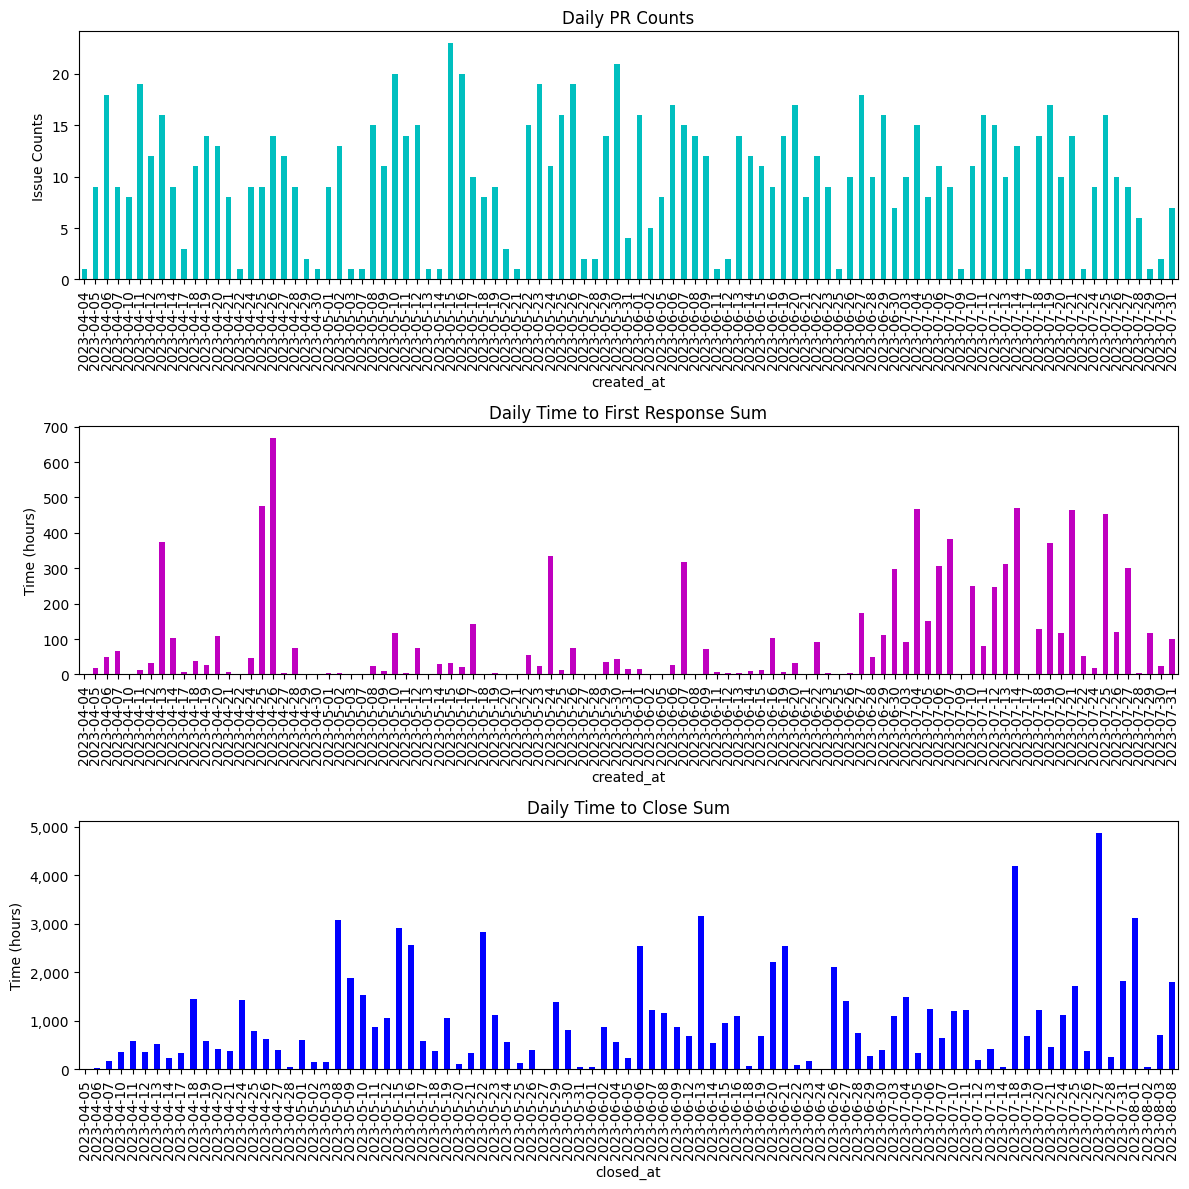

In [13]:
fig, ax = plt.subplots(3, 1, figsize=(12, 12))

daily_counts.plot(kind='bar', ax=ax[0], title='Daily PR Counts', color='c')
ax[0].set_ylabel('Issue Counts')

daily_time_to_first_response_sum.plot(kind='bar', ax=ax[1], title='Daily Time to First Response Sum', color='m')
ax[1].set_ylabel('Time (hours)')
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

daily_time_to_close_sum.plot(kind='bar', ax=ax[2], title='Daily Time to Close Sum', color='b')
ax[2].set_ylabel('Time (hours)')
ax[2].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()
plt.show()

In [14]:
# 平均値
daily_avg_first_response = df.groupby('created_at')['time_to_first_response'].mean() / 60 / 60
daily_avg_time_to_close = df.groupby('closed_at')['time_to_close'].mean() / 60 / 60

daily_median_first_response = df.groupby('created_at')['time_to_first_response'].median() / 60 / 60
daily_median_time_to_close = df.groupby('closed_at')['time_to_close'].median() / 60 / 60

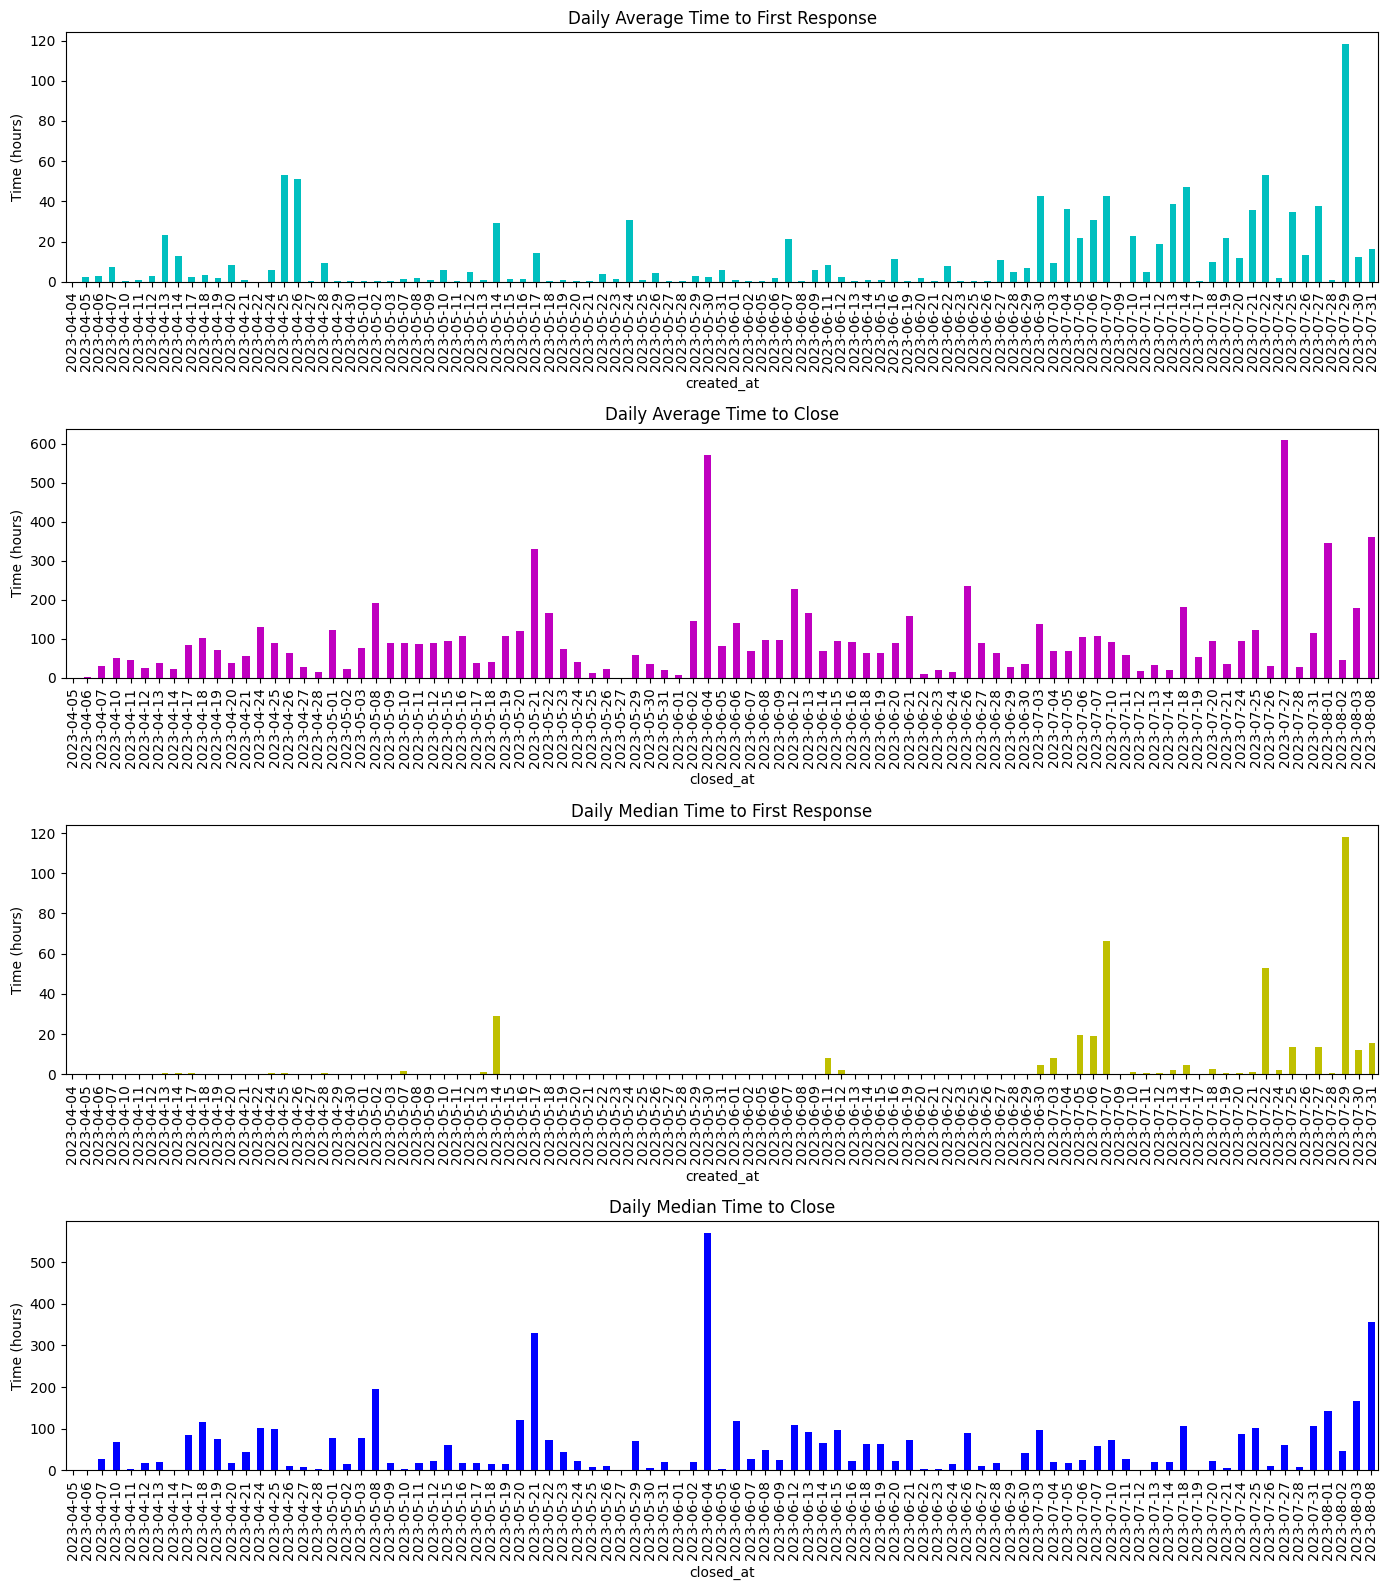

In [15]:
fig, ax = plt.subplots(4, 1, figsize=(14, 16))

daily_avg_first_response.plot(kind='bar', ax=ax[0], title='Daily Average Time to First Response', color='c')
ax[0].set_ylabel('Time (hours)')
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

daily_avg_time_to_close.plot(kind='bar', ax=ax[1], title='Daily Average Time to Close', color='m')
ax[1].set_ylabel('Time (hours)')
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

daily_median_first_response.plot(kind='bar', ax=ax[2], title='Daily Median Time to First Response', color='y')
ax[2].set_ylabel('Time (hours)')
ax[2].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

daily_median_time_to_close.plot(kind='bar', ax=ax[3], title='Daily Median Time to Close', color='b')
ax[3].set_ylabel('Time (hours)')
ax[3].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()
plt.show()

In [18]:
# 水曜始まりの週次データを作成する
df['created_week'] = pd.to_datetime(df['created_at']).dt.to_period('W-WED')
df['closed_week'] = pd.to_datetime(df['closed_at']).dt.to_period('W-WED')

weekly_avg_first_response = df.groupby('created_week')['time_to_first_response'].mean() / 60 / 60
weekly_avg_time_to_close = df.groupby('closed_week')['time_to_close'].mean() / 60 / 60

weekly_median_first_response = df.groupby('created_week')['time_to_first_response'].median() / 60 / 60
weekly_median_time_to_close = df.groupby('closed_week')['time_to_close'].median() / 60 / 60

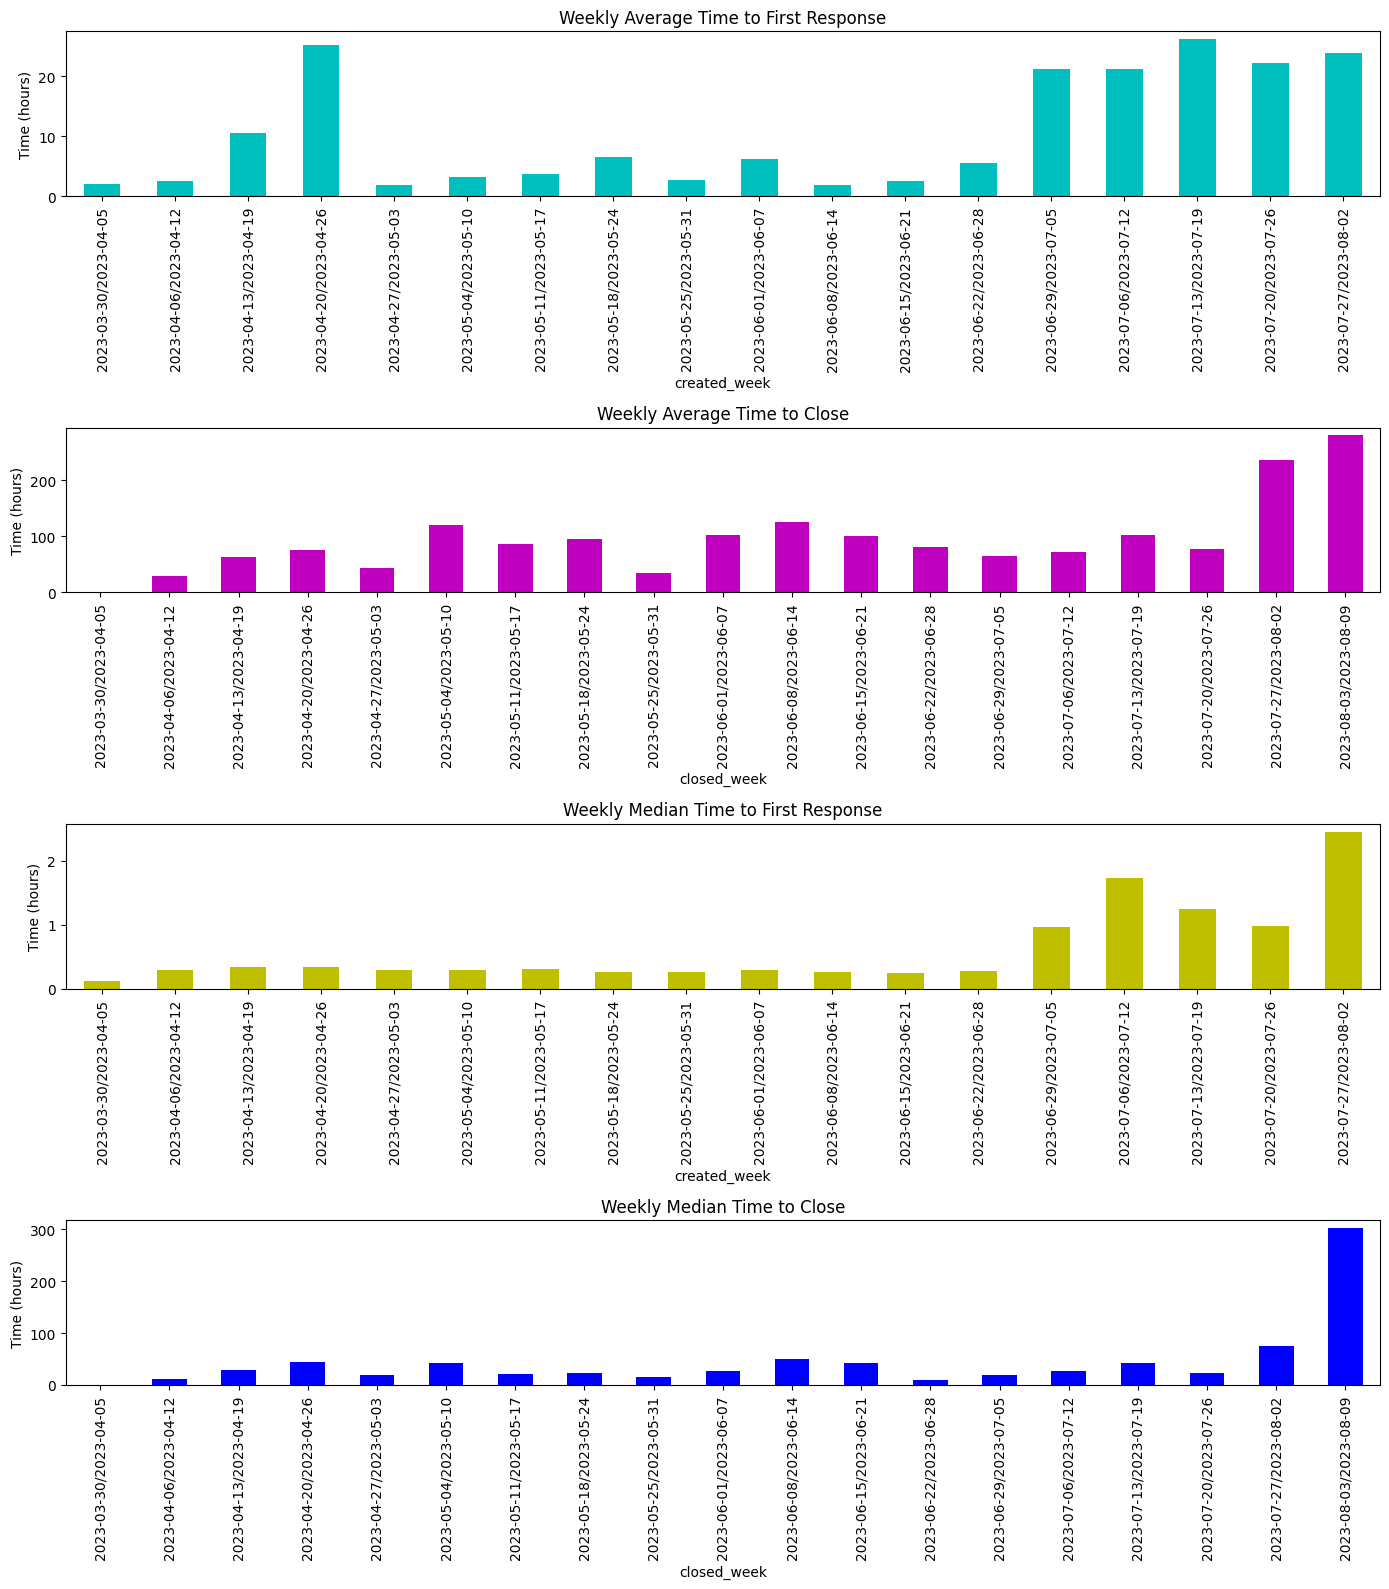

In [22]:
fig, ax = plt.subplots(4, 1, figsize=(14, 16))

weekly_avg_first_response.plot(kind='bar', ax=ax[0], title='Weekly Average Time to First Response', color='c')
ax[0].set_ylabel('Time (hours)')
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

weekly_avg_time_to_close.plot(kind='bar', ax=ax[1], title='Weekly Average Time to Close', color='m')
ax[1].set_ylabel('Time (hours)')
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

weekly_median_first_response.plot(kind='bar', ax=ax[2], title='Weekly Median Time to First Response', color='y')
ax[2].set_ylabel('Time (hours)')
ax[2].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

weekly_median_time_to_close.plot(kind='bar', ax=ax[3], title='Weekly Median Time to Close', color='b')
ax[3].set_ylabel('Time (hours)')
ax[3].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()
plt.show()

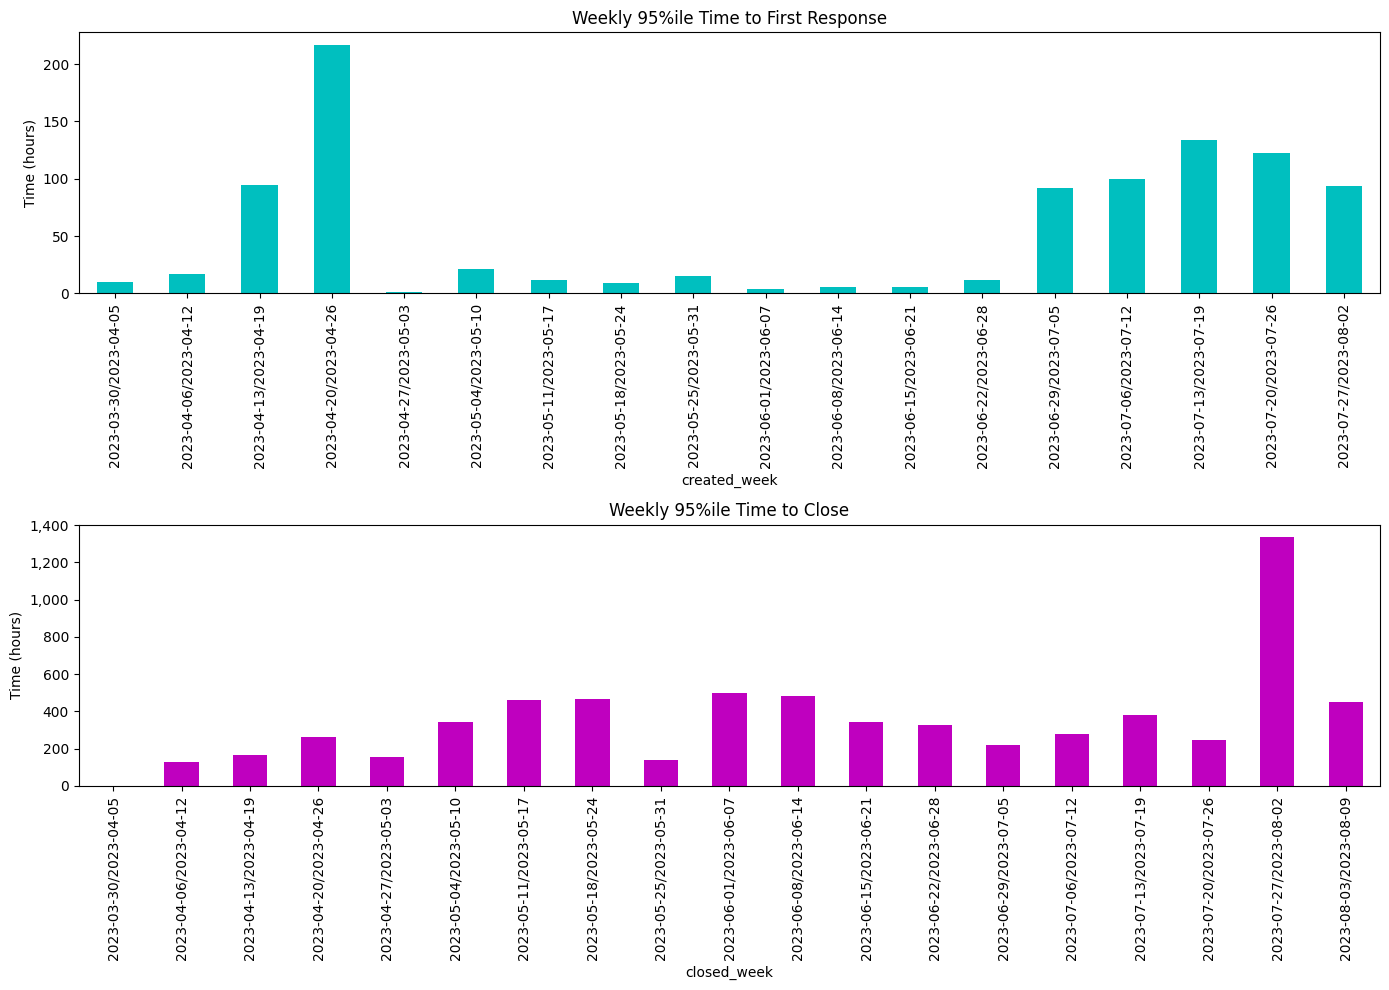

In [21]:
# 95%ile
weekly_95ile_first_response = df.groupby('created_week')['time_to_first_response'].quantile(0.95) / 60 / 60
weekly_95ile_time_to_close = df.groupby('closed_week')['time_to_close'].quantile(0.95) / 60 / 60

fig, ax = plt.subplots(2, 1, figsize=(14, 10))

weekly_95ile_first_response.plot(kind='bar', ax=ax[0], title='Weekly 95%ile Time to First Response', color='c')
ax[0].set_ylabel('Time (hours)')
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

weekly_95ile_time_to_close.plot(kind='bar', ax=ax[1], title='Weekly 95%ile Time to Close', color='m')
ax[1].set_ylabel('Time (hours)')
ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()
plt.show()

In [29]:
# rcfixの件数を集計
rcfix_df = df[df['title'].str.contains('rcfix', case=False, na=False)].copy()  # .copy()を追加して元のデータへの影響を避ける

rcfix_df.loc[:, 'created_at'] = pd.to_datetime(rcfix_df['created_at']).dt.date
rcfix_df.loc[:, 'created_week'] = pd.to_datetime(rcfix_df['created_at']).dt.to_period('W-WED')

weekly_count = rcfix_df.groupby('created_week').size()

full_period_index = pd.period_range(start=rcfix_df['created_week'].min(), end=rcfix_df['created_week'].max(), freq='W-WED')
weekly_count = weekly_count.reindex(full_period_index, fill_value=0)


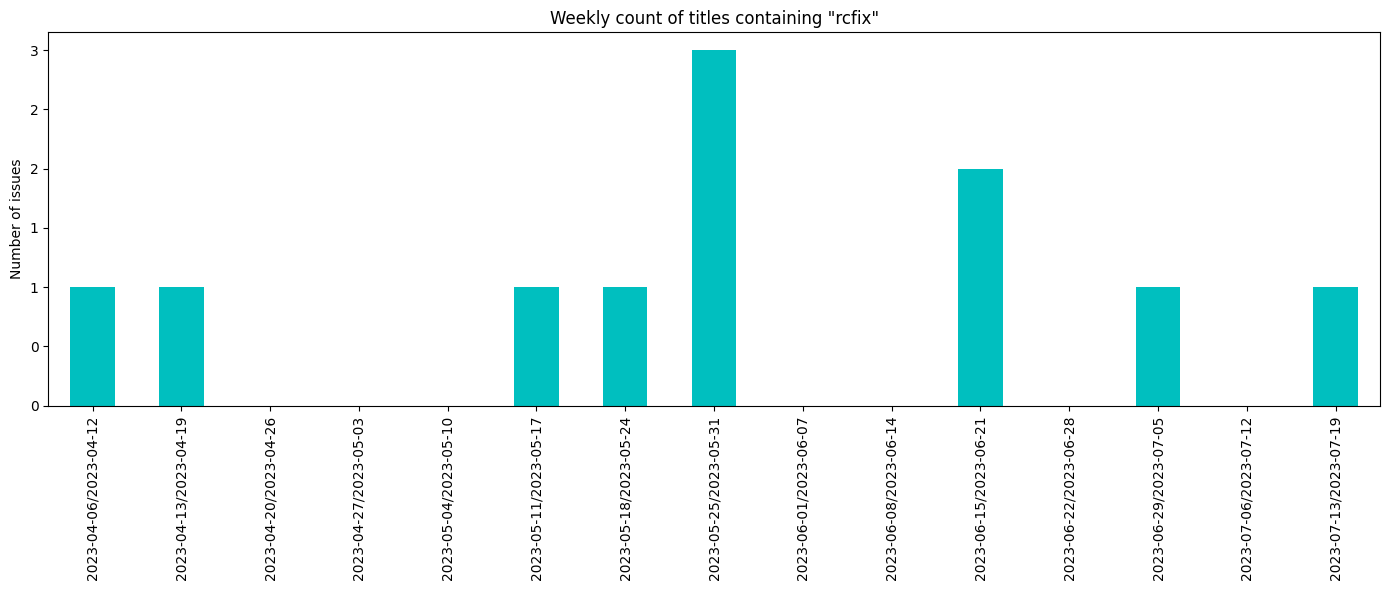

In [30]:
fig, ax = plt.subplots(figsize=(14, 6))

weekly_count.plot(kind='bar', ax=ax, title='Weekly count of titles containing "rcfix"', color='c')
ax.set_ylabel('Number of issues')
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout()
plt.show()

In [31]:
# open/closeの件数推移
daily_opened = df.groupby('created_at').size()
daily_closed = df.groupby('closed_at').size()

full_period_index = pd.date_range(start=df['created_at'].min(), end=df['created_at'].max(), freq='D')

daily_opened = daily_opened.reindex(full_period_index, fill_value=0)
daily_closed = daily_closed.reindex(full_period_index, fill_value=0)

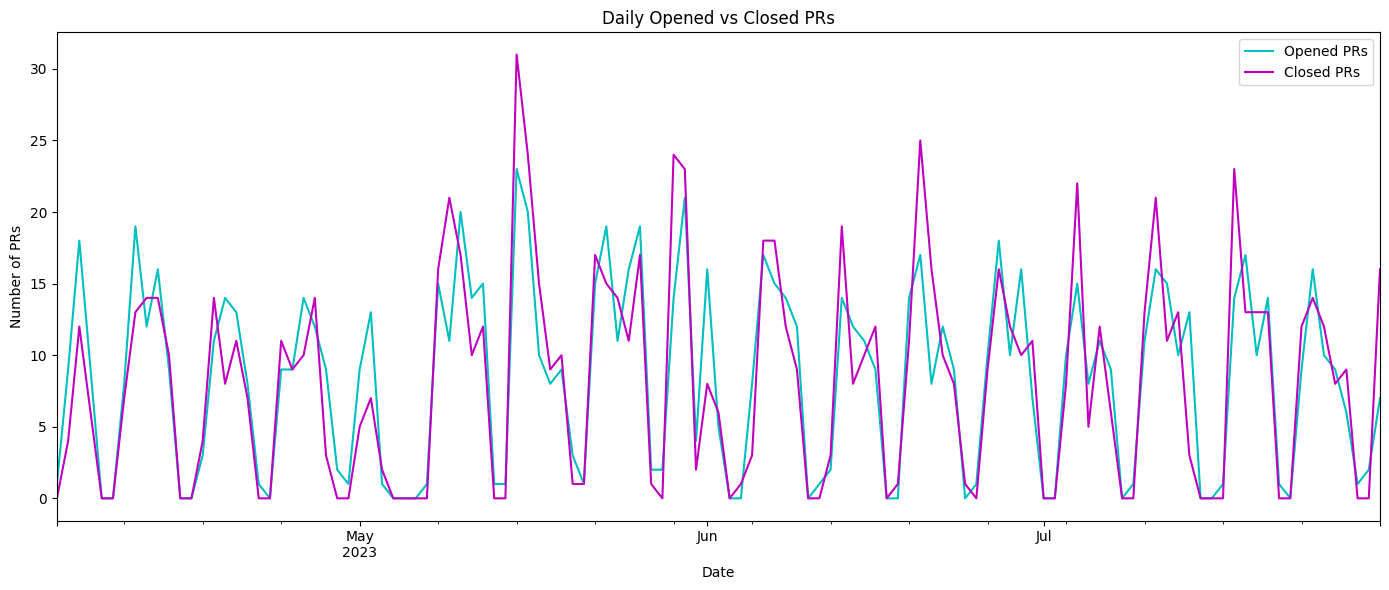

In [32]:
fig, ax = plt.subplots(figsize=(14, 6))
daily_opened.plot(ax=ax, label='Opened PRs', color='c')
daily_closed.plot(ax=ax, label='Closed PRs', color='m')
ax.set_title('Daily Opened vs Closed PRs')
ax.set_xlabel('Date')
ax.set_ylabel('Number of PRs')
ax.legend()

plt.tight_layout()
plt.show()